# Lecture 1 and 2

### Evaluation

- Assignments ( 10 % )
- Class Participation ( 20 % )
- Two Exams ( 50 % )
- Project ( 20 % )

### Course Content

- Python Programming
- Root finding
- Numerical Integration and Derivation
- Solving Differential Equations
    - First Order ODEs
    - Time Stepping
    - Iterative Methods
    - Finite Difference
- Monte Carlo Methods
- Spectral Methods
- Neural Networks



## Root Finding

### Bisection Method

### Newton Raphson Method

#### Convergence in Newton's Method

#### Examples of Failure to Converge

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
def function(x):
    return np.tan(x) - np.exp(x)
def function_derivative(x):
    return (function(x + 1e-6) - function(x))/1e-6

In [3]:
def bisection_method(a, b):
    start = time.time()
    left = a
    right = b
    root = 0
    iterations = 0
    tolerance = 1e-6
    section = right - left
    while np.abs(section) > tolerance:
        iterations += 1
        x = (left + right) / 2
        if (function(x)*function(a) < 0):
            right = x
            section = right - left
        else:
            left = x
            section = right - left
        root = x
    end = time.time()
    print("Bisection Method")
    print("Iterations: ", iterations)
    print(f"Time:  {end - start:.6f}")
    print(f"Root Obtained: {root:7f}")
    print(f"Error: {section:10f}\n")


In [4]:
def newton_method(a,b):
    slopes = []
    start = time.time()
    left = a
    right = b
    root = (a + b) / 2
    iterations = 0
    tolerance = 1e-6
    del_x = right - left
    while np.abs(del_x) > tolerance:
        iterations += 1
        del_x = function(root)/function_derivative(root)
        slopes.append((root, del_x))
        root -= del_x

    end = time.time()
    print("Newton Raphson Method")
    print(f"Iterations: {iterations}")
    print(f"Time:  {end - start:.6f}")
    print(f"Root Obtained: {root:7f}")
    print(f"Error: {del_x:10f}\n")
    return slopes




In [6]:
bisection_method(-1,1.5)
slopes = newton_method(-1,1.5)
slopes

Bisection Method
Iterations:  22
Time:  0.000060
Root Obtained: 1.306327
Error:   0.000001

Newton Raphson Method
Iterations: 7
Time:  0.000021
Root Obtained: -3.096412
Error:   0.000000



[(0.25, np.float64(4.700913654069022)),
 (np.float64(-4.450913654069022), np.float64(-0.25069542077049495)),
 (np.float64(-4.200218233298527), np.float64(-0.4323442843486586)),
 (np.float64(-3.7678739489498683), np.float64(-0.4976057461995546)),
 (np.float64(-3.2702682027503136), np.float64(-0.17102167591722398)),
 (np.float64(-3.0992465268330895), np.float64(-0.0028343968081124557)),
 (np.float64(-3.096412130024977), np.float64(1.74888662033806e-07))]

## Lecture 3

- Riemann Sum
- Trapezoidal Rule
- Simpson ( Optional for fun )

In [24]:
import math
import time

def f(x):
    if x == 0: return 1
    return math.sin(x)/x

vec = np.vectorize(f)
def trap (f, n, a,b):
    start = time.time()
    h = (b-a)/n
    intgr = 0.5 * h * (f(a) + f(b))
    for i in range(1, int(n)):
        intgr += h * f(a + i * h)
    end = time.time()
    print(f"Integration time: {end - start:.6f}")
    return intgr



def simpson(f, n, a, b):
    if n % 2 == 1:
        raise ValueError("n must be even for Simpson's rule")

    start = time.time()
    h = (b - a) / n
    x0 = f(a) + f(b)
    x1 = sum(f(a + i * h) for i in range(1, n, 2))  # odd indices
    x2 = sum(f(a + i * h) for i in range(2, n-1, 2))  # even indices
    intgr = h / 3 * (x0 + 4 * x1 + 2 * x2)
    end = time.time()
    print(f"Integration time: {end - start:.6f}")
    return intgr


trap(f, 100000, 0 ,1), simpson(f, 100000, 0 ,1)



Integration time: 0.010483
Integration time: 0.009172


(0.9460830703646869, 0.9460830703671831)

In [25]:
import numpy as np
import time
import math

# Scalar function
def f_scalar(x):
    if x == 0:
        return 1.0
    return math.sin(x) / x

# Vectorized version
f = np.vectorize(f_scalar)

def trap(f, n, a, b):
    start = time.time()
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)  # n+1 points for n intervals
    y = f(x)
    intgr = h * (0.5 * y[0] + np.sum(y[1:-1]) + 0.5 * y[-1])
    end = time.time()
    print(f"Trapezoidal Integration time: {end - start:.6f}")
    return intgr

def simpson(f, n, a, b):
    if n % 2 == 1:
        raise ValueError("n must be even for Simpson's rule")
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)
    intgr = h / 3 * (y[0] + y[-1] + 4 * np.sum(y[1:-1:2]) + 2 * np.sum(y[2:-2:2]))
    return intgr

# Run both methods
trap_result = trap(f, 1_500, 0, 1)
simpson_result = simpson(f, 1_500, 0, 1)
print("Trapezoidal result: ", trap_result)
print("Simpson's result: \t", simpson_result)


Trapezoidal Integration time: 0.000361
Ran Simpson: 0 - 1
Trapezoidal result:  0.9460830592127876
Simpson's result: 	 0.9460830703671831


## Lecture 4: Interpolation

- Newton Method
- Lagrange Method
- Derivation of Simpson
- 2d and 3d Integral




# Newton–Cotes Quadrature (and why it leads to Simpson’s rule)

## What “quadrature” means
Quadrature is numerical integration: approximating a definite integral $∫_a^b f(x)dx$ by a weighted sum of function values at selected points in $[a,b]$. In Newton–Cotes quadrature, those points are chosen to be equally spaced, and the weights are determined by integrating the Lagrange interpolation polynomial that passes through those points.

## Core idea
- Pick n+1 equally spaced nodes $x_0,…,x_n$ in $[a,b]$.
- Interpolate $f(x)$ with the degree-n polynomial $L(x)$ built from these nodes (Lagrange form).
- Integrate the interpolant exactly: $$∫_a^b f(x)dx ≈ ∫_a^b L(x)dx = Σ_i w_i f(x_i)$$, where the weights $w_i$ are the integrals of the Lagrange basis polynomials and depend only on node locations.

This yields a whole family of formulas known as the Newton–Cotes rules.

## Closed vs. Open Newton–Cotes
- Closed Newton–Cotes: includes the endpoints a and b as nodes $(x_0=a, x_n=b)$.
- Open Newton–Cotes: excludes the endpoints; all nodes lie strictly inside $(a,b).$

Both use equally spaced nodes; the step h differs slightly:
- Closed: $x_i = a + i h, h=(b−a)/n$.
- Open: $x_i = a + (i+1) h, h=(b−a)/(n+2)$.

## Accuracy and when they’re used
- For a rule with n+1 nodes (degree n interpolant), the algebraic degree of precision is n for odd n and n+1 for even n (i.e., exact for polynomials up to that degree).
- High-degree closed Newton–Cotes become unstable: for n≥10 some weights turn negative and oscillatory behavior can hurt accuracy; in practice, low-degree rules are preferred and applied in composite form (subdivide $[a,b]$ into many small panels and apply a low-degree rule on each).
- In many modern applications, when nodes are adjustable, Gaussian or Clenshaw–Curtis quadrature outperform high-order Newton–Cotes.

## Canonical closed Newton–Cotes rules
- n=1 (2 points): Trapezoidal rule
  $$∫_a^b f(x)dx \approx \frac{h}{2}(f_0+f_1)$$, with $h=b−a$.
- n=2 (3 points): Simpson’s rule
  $$∫_a^b f(x)dx \approx \frac{h}{3}(f_0+4f_1+f_2)$$, with h=(b−a)/2.
- n=3 (4 points): Simpson’s 3/8 rule
  $$∫_a^b f(x)dx \approx \frac{3h}{8}(f_0+3f_1+3f_2+f_3)$$, with h=(b−a)/3.
- n=4 (5 points): Boole’s rule
  $$∫_a^b f(x)dx \approx \frac{2h}{45}(7f_0+32f_1+12f_2+32f_3+7f_4) \quad \text{with } h= \frac{b−a}{4}.$$

Error models (single panel):
- Trapezoidal: error $\approx −\frac{h^3}{12} f''(\epsilon)$.
- Simpson’s 1/3: error $\approx −\frac{h^5}{90} f^{4}(\epsilon)$.
- 3/8: error $\approx −3 \frac{h^5}{80} f^{4}(\epsilon)$.

These constants refer to the single-interval (non-composite) formulas on $[a,b]$; in composite use over subintervals, h is the subinterval width and the global error scales with the number of panels accordingly.




In [7]:
import numpy as np
import matplotlib.pyplot as plt
import time as time


In [8]:
def simpson_prevectorized(y, h):
    n = len(y) - 1
    if n % 2 != 0:
        raise ValueError("len(y)-1 must be even")
    return (h/3) * (y[0] + y[-1] + 4*np.sum(y[1:-1:2]) + 2*np.sum(y[2:-2:2]))

In [9]:
def analytical(radius):
    return np.pi * ( 1 -  np.exp(-radius * radius) )

In [10]:
def sigma(x,y):
    return np.exp(-x**2 - y**2)

def circle_integration(function, radius, n = 10_000):
    if n % 2 != 0:
        raise ValueError("N must be even")
    start = time.time()
    # find value of sigma(x) at every x
        # integrate at every x, based on sqrt(1 - x^2 )
        # create a vector of value at every x
    # integrate sigma(x) for x -R to R
    x_values = np.linspace(-radius, radius, n + 1)
    h_x = (2*radius)/n
    f_x = np.empty(n + 1)
    for i, x in enumerate(x_values):
        n_y = int((n * ((radius - abs(x))/radius))/10 + 1) * 2
        y_max = np.sqrt(radius*radius - x*x)
        y_min = -y_max
        y_values = np.linspace(y_min, y_max, n_y + 1)
        h_y = (y_max - y_min)/n_y
        f_x[i] = simpson_prevectorized(function(x,y_values), h_y)
    end = time.time()
    return (simpson_prevectorized(f_x, h_x),end-start)

def circle_integration_non_optimized(function, radius, n = 10_000):
    if n % 2 != 0:
        raise ValueError("N must be even")
    start = time.time()
    # find value of sigma(x) at every x
        # integrate at every x, based on sqrt(1 - x^2 )
        # create a vector of value at every x
    # integrate sigma(x) for x -R to R
    x_values = np.linspace(-radius, radius, n + 1)
    h_x = (2*radius)/n
    f_x = np.empty(n + 1)
    for i, x in enumerate(x_values):
        y_max = np.sqrt(radius*radius - x*x)
        y_min = -y_max
        y_values = np.linspace(y_min, y_max, n + 1)
        h_y = (y_max - y_min)/n
        f_x[i] = simpson_prevectorized(function(x,y_values), h_y)
    end = time.time()
    return (simpson_prevectorized(f_x, h_x),end-start)

def circle_integration_grid_optimized(function, radius, n = 10_000):
    start = time.time()
    x_values = np.linspace(-radius, radius, n + 1)
    y_values = np.linspace(-radius, radius, n + 1)
    h = (2 * radius) / n

    weights_1d = np.ones(n + 1)
    weights_1d[1:-1:2] = 4
    weights_1d[2:-1:2] = 2

    # Create mesh
    X, Y = np.meshgrid(x_values, y_values, indexing='ij')

    # Mask for circle
    mask = X**2 + Y**2 <= radius**2

    # Function values
    F = np.zeros_like(X)
    F[mask] = function(X[mask], Y[mask])

    # Apply 2D Simpson weights
    W = np.outer(weights_1d, weights_1d)
    integral = (h * h / 9) * np.sum(W * F)
    end = time.time()
    return (integral,end-start)


In [11]:
r = 1
n = 12_000
print(f'Optimized Integration')
value = circle_integration(sigma,r,n)[0]
print(f'Value: {value}')
print(f'Analytical result: {analytical(r)}')
print(f'Error: {np.log10(abs(value - analytical(r))):.2f}\n')
print(f'-----------------------------------------------')
print(f'Unoptimized Integration')
value = circle_integration_non_optimized(sigma,r,n)[0]
print(f'Value: {value}')
print(f'Analytical result: {analytical(r)}')
print(f'Error: {np.log10(abs(value - analytical(r))):.2f}\n')
print(f'-----------------------------------------------')
print(f'Grid Integration')
value = circle_integration_grid_optimized(sigma,r,n)[0]
print(f'Value: {value}')
print(f'Analytical result: {analytical(r)}')
print(f'Error: {np.log10(abs(value - analytical(r))):.2f}\n')


Optimized Integration
Value: 1.9858649403026987
Analytical result: 1.9858653037988714
Error: -6.44

-----------------------------------------------
Unoptimized Integration
Value: 1.9858649402910138
Analytical result: 1.9858653037988714
Error: -6.44

-----------------------------------------------
Grid Integration
Value: 1.985864586529492
Analytical result: 1.9858653037988714
Error: -6.14



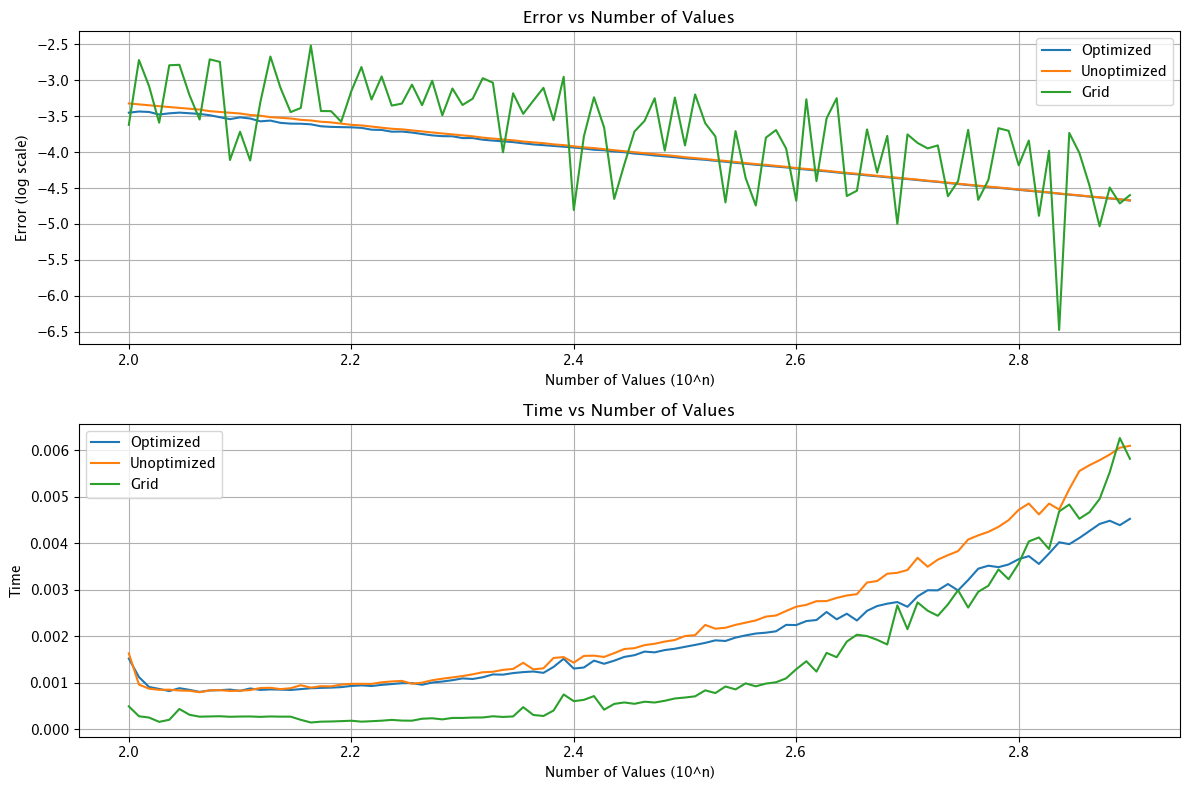

In [34]:
n_values = np.linspace(2, 2.9, 100)  # log10(n)
n_10 = (((10**n_values)//2)*2).astype(int)  # even integers

values_optimized = []
times_optimized = []
values_unoptimized = []
times_unoptimized = []
values_grid = []
times_grid = []
value_analytical = analytical(r)

for n in n_10:
    val_opt, time_opt = circle_integration(sigma, r, n)
    val_unopt, time_unopt = circle_integration_non_optimized(sigma, r, n)
    val_grid, time_grid = circle_integration_grid_optimized(sigma, r, n)

    values_optimized.append(val_opt - value_analytical)
    times_optimized.append(time_opt)

    values_unoptimized.append(val_unopt - value_analytical)
    times_unoptimized.append(time_unopt)

    values_grid.append(val_grid - value_analytical)
    times_grid.append(time_grid)



plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(n_values, np.log10(abs(np.array(values_optimized))), label='Optimized')
plt.plot(n_values, np.log10(abs(np.array(values_unoptimized))), label='Unoptimized')
plt.plot(n_values, np.log10(abs(np.array(values_grid))), label='Grid')
plt.xlabel('Number of Values (10^n)')
plt.ylabel('Error (log scale)')
plt.title('Error vs Number of Values')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(n_values, times_optimized, label='Optimized')
plt.plot(n_values, times_unoptimized, label='Unoptimized')
plt.plot(n_values, times_grid, label='Grid')
plt.xlabel('Number of Values (10^n)')
plt.ylabel('Time')
plt.title('Time vs Number of Values')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



## Lecture 6: Ordinary Differential Equations




## First-Order ODEs

Any problem involving ordinary differential equations (ODEs) can be simplified into a set of first-order differential equations. This is the standard starting point for most numerical solutions.

A higher-order equation, like a second-order one, can be rewritten as two first-order equations by introducing a new variable for the first derivative. For example, the equation:

$$\frac{d^{2}y}{dx^{2}}+q(x)\frac{dy}{dx}=r(x)$$

can be expressed as a system of two first-order equations:

$$\frac{dy}{dx}=z(x)$$
$$\frac{dz}{dx}=r(x)-q(x)z(x)$$

This reduces the generic problem to solving a set of N coupled first-order equations for functions $y_i(x)$:

$$\frac{dy_{i}(x)}{dx}=f_{i}(x,y_{1},...,y_{N}), \quad i=1,...,N$$

To solve this system, you need **boundary conditions**, which are algebraic conditions on the values of the functions $y_i$. This guide focuses on **initial value problems**, where the values of all dependent variables are known at a single starting point, $x_s$.

---
## Time Stepping

The fundamental concept behind numerically solving an initial value problem is **time stepping** (or simply "stepping" if the independent variable isn't time). The core idea is to discretize the problem by rewriting the derivatives ($dy/dx$) as finite steps ($\Delta y / \Delta x$). This converts the differential equations into simple algebraic formulas that allow you to advance the solution from a point $x_n$ to $x_{n+1}$ in a step of size $h = \Delta x$.

The most straightforward implementation of this is **Euler's Method**:

$$y_{n+1}=y_{n}+hf(x_{n},y_{n})$$

This formula advances the solution using only the derivative information at the beginning of the interval. While conceptually important, Euler's method is not recommended for practical use because it is not very accurate or stable. However, this basic idea of adding small, derivative-based increments to the functions is the foundation upon which all practical, iterative methods are built.

---
## Iterative Methods

Practical ODE solvers apply a stepping formula iteratively to propagate the solution. These methods can be broadly categorized into three main types: Runge-Kutta, Bulirsch-Stoer, and Predictor-Corrector methods.

### Runge-Kutta Methods
Runge-Kutta is a robust and widely used family of methods. The basic idea is to combine information from several Euler-style steps to achieve a higher order of accuracy. Instead of taking one large step, it takes several trial steps within an interval and combines their results to cancel out error terms.

* **Second-Order Runge-Kutta (Midpoint Method):** This method improves on Euler's method by using a trial step to the midpoint of the interval to get a more accurate slope for the full step. The formulas are:
    $$k_{1}=hf(x_{n},y_{n})$$
    $$k_{2}=hf(x_{n}+\frac{1}{2}h,y_{n}+\frac{1}{2}k_{1})$$
    $$y_{n+1}=y_{n}+k_{2}$$
* **Fourth-Order Runge-Kutta:** This is the most common "workhorse" method, valued for its balance of accuracy and efficiency. It requires four evaluations of the derivative per step. The formula is:
    $$k_{1}=hf(x_{n},y_{n})$$
    $$k_{2}=hf(x_{n}+\frac{h}{2},y_{n}+\frac{k_{1}}{2})$$
    $$k_{3}=hf(x_{n}+\frac{h}{2},y_{n}+\frac{k_{2}}{2})$$
    $$k_{4}=hf(x_{n}+h, y_{n} + k_3)$$
    $$y_{n+1}=y_{n}+\frac{k_{1}}{6}+\frac{k_{2}}{3}+\frac{k_{3}}{3}+\frac{k_{4}}{6}+O(h^{5})$$

### Bulirsch-Stoer Method
This method is considered the best for achieving high-accuracy solutions for smooth functions with minimal computation. It is built on three key ideas:
1.  **Richardson Extrapolation:** Treating the numerical result as a function of stepsize $h$ and extrapolating to what the answer would be at $h=0$.
2.  **Rational Function/Polynomial Extrapolation:** Using more powerful fitting functions than simple power series, which allows for much larger step sizes.
3.  **Modified Midpoint Method:** Using an underlying integrator whose error series contains only even powers of $h$, making the extrapolation much more efficient.

### Predictor-Corrector Methods
These methods use a history of previously calculated points to extrapolate a guess for the next point (the **predictor** step) and then use the derivative at that guessed point to refine the solution (the **corrector** step). A popular example is the **Adams-Bashforth-Moulton** scheme. While efficient for very smooth functions, they can be difficult to start and to adapt the stepsize.

---
## Finite Difference

The term "finite difference" refers to the core principle of all these numerical methods: approximating continuous derivatives with algebraic expressions involving discrete function values. A crucial distinction in these schemes is between explicit and implicit methods, which is especially important for solving "stiff" equations (problems with widely different scales of change).

### Explicit vs. Implicit Methods

* **Explicit Method (e.g., Forward Euler):** The new value $y_{n+1}$ is calculated explicitly using only known values at the previous step, $y_n$. For the equation $y' = -cy$, the formula is:
    $$y_{n+1} = y_{n} + hy'_{n} = (1 - ch)y_n$$
    Explicit methods are simple but can become unstable if the step size $h$ is too large.

* **Implicit Method (e.g., Backward Euler):** The derivative is evaluated at the *new* point $y_{n+1}$, meaning the new value appears on both sides of the equation. For $y' = -cy$, this gives:
    $$y_{n+1} = y_{n} + hy'_{n+1} \implies y_{n+1} = \frac{y_n}{1 + ch}$$
    This requires solving an equation (often a matrix equation) at each step, but it is far more stable, making it essential for stiff problems.

### Examples in Other Schemes
The finite difference concept appears in more advanced methods as well:
* **Modified Midpoint Method:** Uses a centered difference formula:
    $$z_{m+1} = z_{m-1} + 2hf(x + mh, z_m)$$
* **Stoermer's Rule:** This method is for second-order equations of the form $y'' = f(x, y)$ and uses a direct finite difference approximation for the second derivative:
    $$y_{k+1} - 2y_k + y_{k-1} = h^2f(x_0 + kh, y_k)$$

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def euler_step(f, x, y, h):
    """
    Performs a single step of the Euler method.

    Args:
        f (function): The function representing the derivative dy/dx = f(x, y).
        x (float): The current value of the independent variable.
        y (float): The current value of the dependent variable.
        h (float): The step size.

    Returns:
        float: The new value of y after one step.
    """
    # y_new = y_old + h * slope
    return y + h * f(x, y)

def rk2_step(f, x, y, h):
    """
    Performs a single step of the second-order Runge-Kutta method (Midpoint Method).

    Args:
        f (function): The function representing the derivative dy/dx = f(x, y).
        x (float): The current value of the independent variable.
        y (float): The current value of the dependent variable.
        h (float): The step size.

    Returns:
        float: The new value of y after one step.
    """
    # Calculate the slope at the midpoint
    k1 = h * f(x, y)
    k2 = h * f(x + 0.5 * h, y + 0.5 * k1)

    # Update y using the midpoint slope
    return y + k2

def rk4_step(f, x, y, h):
    """
    Performs a single step of the fourth-order Runge-Kutta method.

    Args:
        f (function): The function representing the derivative dy/dx = f(x, y).
        x (float): The current value of the independent variable.
        y (float): The current value of the dependent variable.
        h (float): The step size.

    Returns:
        float: The new value of y after one step.
    """
    k1 = h * f(x, y)
    k2 = h * f(x + 0.5 * h, y + 0.5 * k1)
    k3 = h * f(x + 0.5 * h, y + 0.5 * k2)
    k4 = h * f(x + h, y + k3)

    # Weighted average of the slopes
    return y + (k1 + 2*k2 + 2*k3 + k4) / 6.0


In [11]:
def solve_ode(f, x0, y0, x_end, num_steps, method=rk4_step):
    """
    Solves a first-order ODE over a specified interval using a chosen method.

    Args:
        f (function): The function representing the derivative dy/dx = f(x, y).
        x0 (float): The initial value of the independent variable.
        y0 (float): The initial value of the dependent variable (initial condition).
        x_end (float): The end point of the interval for the solution.
        num_steps (int): The number of steps to take.
        method (function, optional): The integration step function to use.
                                     Defaults to rk4_step.

    Returns:
        tuple: A tuple containing two numpy arrays:
               - x_values: The values of the independent variable.
               - y_values: The corresponding solution values of the dependent variable.
    """
    # Calculate step size
    h = (x_end - x0) / num_steps

    # Initialize arrays to store the solution
    x_values = np.linspace(x0, x_end, num_steps + 1)
    y_values = np.zeros(num_steps + 1)
    y_values[0] = y0

    # Iteratively apply the chosen method
    for i in range(num_steps):
        y_values[i+1] = method(f, x_values[i], y_values[i], h)

    return x_values, y_values

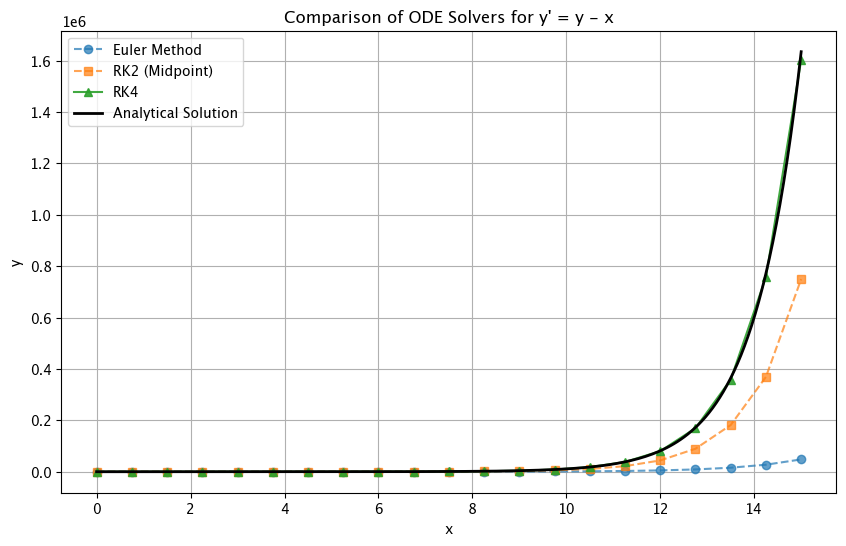

In [23]:
def derivatives(x, y):
    return y - np.sin(x)

x_initial = 0.0
y_initial = 1.0
x_final = 15.0
steps = 20
x_values = np.linspace(x_initial, x_final, steps*10)

# Solve using different methods
x_euler, y_euler = solve_ode(derivatives, x_initial, y_initial, x_final, steps, method=euler_step)
x_rk2, y_rk2 = solve_ode(derivatives, x_initial, y_initial, x_final, steps, method=rk2_step)
x_rk4, y_rk4 = solve_ode(derivatives, x_initial, y_initial, x_final, steps, method=rk4_step)

y_analytical = (np.exp(x_values) + np.sin(x_values) + np.cos(x_values))/2

# Plot the results for comparison
plt.figure(figsize=(10, 12))
plt.subplot(2, 1, 1)
plt.plot(x_euler, y_euler, 'o--', label='Euler Method', alpha=0.7)
plt.plot(x_rk2, y_rk2, 's--', label='RK2 (Midpoint)', alpha=0.7)
plt.plot(x_rk4, y_rk4, '^-', label='RK4', alpha=0.9)
plt.plot(x_values, y_analytical, 'k-', label='Analytical Solution', linewidth=2)
plt.title("Comparison of ODE Solvers for y' = y - x")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)


plt.show()

In [47]:
def verlet_step(func, x, x_down, y, y_down, step, time):

    accel_x = func(x, y, time)[0]
    accel_y = func(x, y, time)[1]

    x_new = 2*x - x_down + (step**2) * accel_x
    y_new = 2*y - y_down + (step**2) * accel_y

    return (x_new, y_new)

In [82]:
def force(x,y,t):
    force_x = np.sin(y)
    force_y = np.cos(x)
    return (force_x, force_y)

x_initial = 0
y_initial = 0
vx_initial = 0
vy_initial = 0

T = 5
dt = 0.001
time = np.arange(0, T, dt)

x_down = x_initial - dt * vx_initial + (dt**2)*(force(x_initial, y_initial, 0)[0])/2
y_down = y_initial - dt * vy_initial + (dt**2)*(force(x_initial, y_initial, 0)[1])/2
x = x_initial
y = y_initial

x_values = np.zeros_like(time)
y_values = np.zeros_like(time)

for i,t in enumerate(time):
    if i == 0:
        x_values[i] = x_initial
        y_values[i] = y_initial

    else:
        x_values[i] , y_values[i] = verlet_step(force, x, x_down, y, y_down, dt, t)
        x_down, y_down = x, y
        x, y = x_values[i], y_values[i]

print(f"Number of steps: {len(x_values)}")


Number of steps: 5000


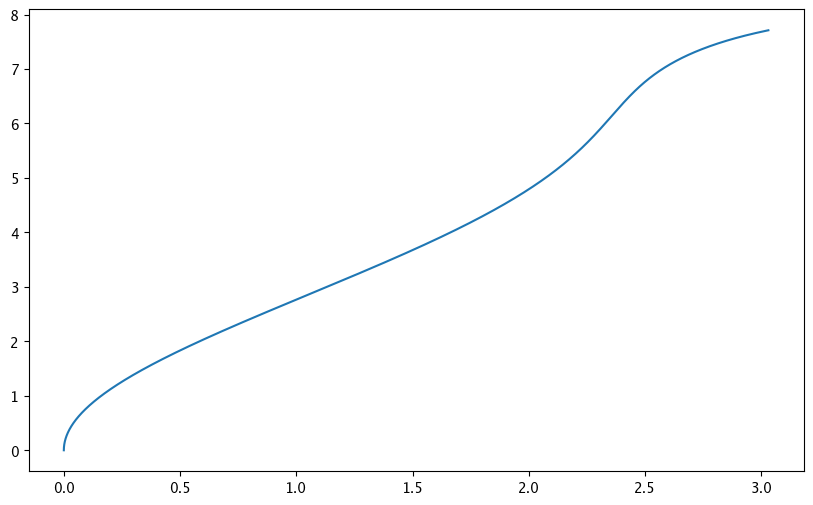

In [83]:
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values)
plt.show()

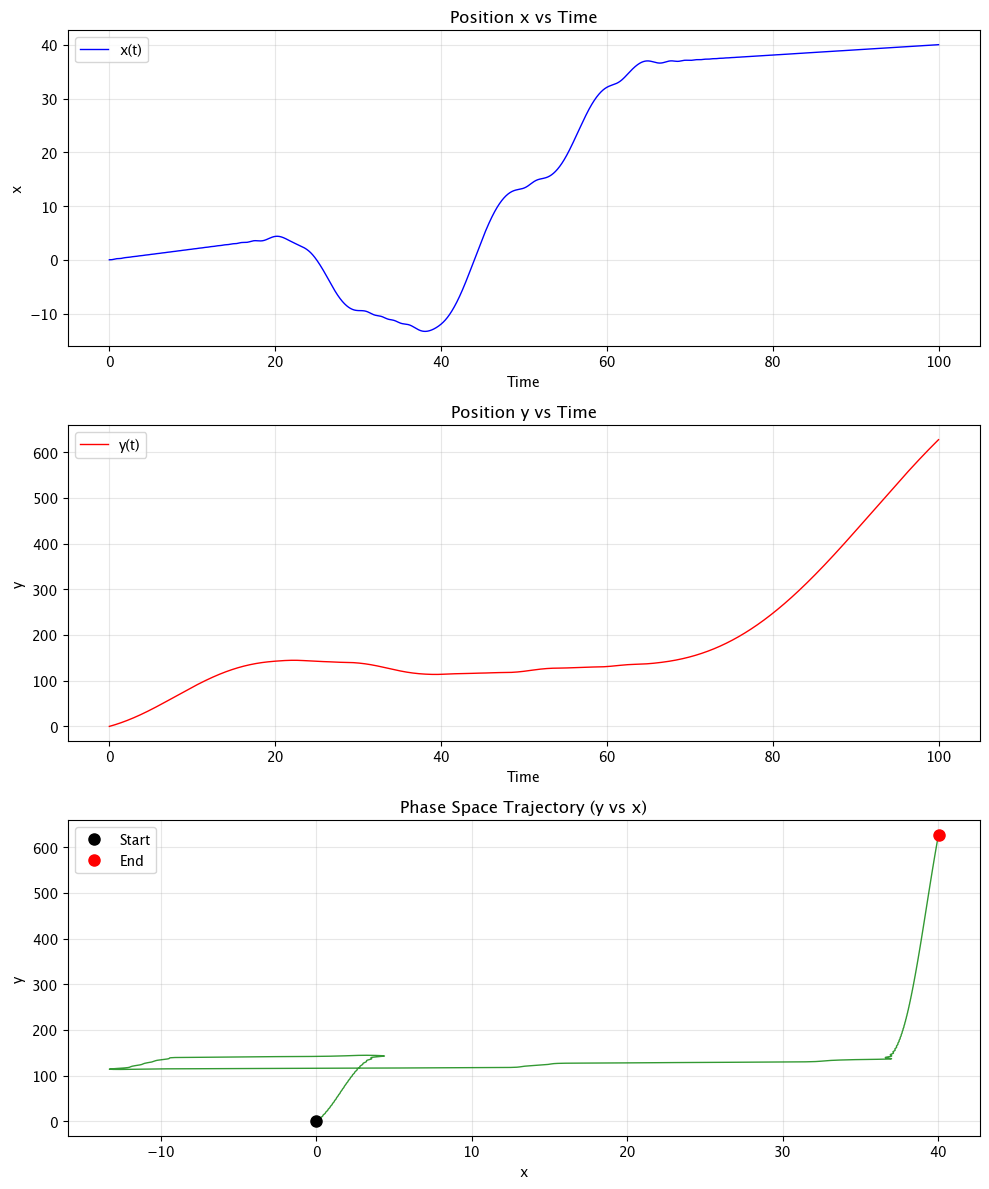

Simulation time: 100 seconds
Time step: 0.01
Number of steps: 10000
Final position: x = 40.0304, y = 627.4189
Position range: x ∈ [-13.3281, 40.0304]
Position range: y ∈ [0.0000, 627.4189]


In [12]:
import numpy as np
import matplotlib.pyplot as plt

def verlet_step(force_func, x, x_prev, y, y_prev, dt, t):
    # Assuming unit mass, so force = acceleration
    accel_x = force_func(x, y, t)[0]
    accel_y = force_func(x, y, t)[1]

    x_new = 2*x - x_prev + dt**2 * accel_x
    y_new = 2*y - y_prev + dt**2 * accel_y

    return x_new, y_new

def force(x, y, t):
    force_x = np.sin(y)
    force_y = np.cos(x)
    return force_x, force_y

# Initial conditions
x_initial = 0
y_initial = 0
vx_initial = 0
vy_initial = 5

# Time setup
T = 100
dt = 0.01
time = np.arange(0, T, dt)

# Calculate initial backward step
x_prev = x_initial - dt * vx_initial + 0.5 * dt**2 * force(x_initial, y_initial, 0)[0]
y_prev = y_initial - dt * vy_initial + 0.5 * dt**2 * force(x_initial, y_initial, 0)[1]

# Initialize arrays
x_values = np.zeros_like(time)
y_values = np.zeros_like(time)

# Set initial values
x_values[0] = x_initial
y_values[0] = y_initial

x_current = x_initial
y_current = y_initial

# Integration loop
for i in range(1, len(time)):
    x_new, y_new = verlet_step(force, x_current, x_prev, y_current, y_prev, dt, time[i])

    x_values[i] = x_new
    y_values[i] = y_new

    # Update for next iteration
    x_prev, y_prev = x_current, y_current
    x_current, y_current = x_new, y_new

# Create plots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))

# Plot x vs time
ax1.plot(time, x_values, 'b-', linewidth=1, label='x(t)')
ax1.set_xlabel('Time')
ax1.set_ylabel('x')
ax1.set_title('Position x vs Time')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Plot y vs time
ax2.plot(time, y_values, 'r-', linewidth=1, label='y(t)')
ax2.set_xlabel('Time')
ax2.set_ylabel('y')
ax2.set_title('Position y vs Time')
ax2.grid(True, alpha=0.3)
ax2.legend()

# Plot phase space (x vs y trajectory)
ax3.plot(x_values, y_values, 'g-', linewidth=1, alpha=0.8)
ax3.plot(x_initial, y_initial, 'ko', markersize=8, label='Start')
ax3.plot(x_values[-1], y_values[-1], 'ro', markersize=8, label='End')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_title('Phase Space Trajectory (y vs x)')
ax3.grid(True, alpha=0.3)
ax3.legend()

plt.tight_layout()
plt.show()

# Print some statistics
print(f"Simulation time: {T} seconds")
print(f"Time step: {dt}")
print(f"Number of steps: {len(time)}")
print(f"Final position: x = {x_values[-1]:.4f}, y = {y_values[-1]:.4f}")
print(f"Position range: x ∈ [{x_values.min():.4f}, {x_values.max():.4f}]")
print(f"Position range: y ∈ [{y_values.min():.4f}, {y_values.max():.4f}]")

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
def Force(x, y):
    return np.array([np.sin(y),np.cos(x)])

In [68]:
def rk4_step_original(function, state, time, dt):
    print(state)
    accel1 = function(state[0][0], state[1][0])
    k1_x_coord = state[0][1]
    k1_y_coord = state[1][1]
    k1_x_vel = accel1[0]
    k1_y_vel = accel1[1]

    accel2 = function(state[0][0] + 0.5 * dt * k1_x_coord, state[1][0] + 0.5 * dt * k1_y_coord)
    k2_x_coord = state[0][1] + 0.5 * dt * k1_x_vel
    k2_y_coord = state[1][1] + 0.5 * dt * k1_y_vel
    k2_x_vel = accel2[0]
    k2_y_vel = accel2[1]

    accel3 = function(state[0][0] + 0.5 * dt * k2_x_coord, state[1][0] + 0.5 * dt * k2_y_coord)
    k3_x_coord = state[0][1] + 0.5 * dt * k2_x_vel
    k3_y_coord = state[1][1] + 0.5 * dt * k2_y_vel
    k3_x_vel = accel3[0]
    k3_y_vel = accel3[1]

    accel4 = function(state[0][0] + dt * k3_x_coord, state[1][0] + dt * k3_y_coord)
    k4_x_coord = state[0][1] + dt * k3_x_vel
    k4_y_coord = state[1][1] + dt * k3_y_vel
    k4_x_vel = accel4[0]
    k4_y_vel = accel4[1]

    x_coord_next = state[0][0] + ((dt / 6.0) * ( k1_x_coord + 2* k2_x_coord + 2 * k3_x_coord + k4_x_coord ))
    y_coord_next = state[1][0] + ((dt / 6.0) * ( k1_y_coord + 2* k2_y_coord + 2 * k3_y_coord + k4_y_coord ))
    x_vel_next = state[0][1] + ((dt / 6.0) * ( k1_x_vel + 2 * k2_x_vel + 2 * k3_x_vel + k4_x_vel ))
    y_vel_next = state[1][1] + ((dt / 6.0) * ( k1_y_vel + 2 * k2_y_vel + 2 * k3_y_vel + k4_y_vel ))

    state_x_next = np.array([x_coord_next, x_vel_next])
    state_y_next = np.array([y_coord_next, y_vel_next])
    state_next = np.array([state_x_next, state_y_next])
    return state_next

In [69]:

def rk4_step(function, state, time, dt):
    # Unpack state
    print(state)
    x, vx = state[0]
    y, vy = state[1]

    # k1
    ax1, ay1 = function(x, y)
    k1_x, k1_vx, k1_y, k1_vy = vx, ax1, vy, ay1

    # k2
    ax2, ay2 = function(x + 0.5*dt*k1_x, y + 0.5*dt*k1_y)
    k2_x, k2_vx, k2_y, k2_vy = vx + 0.5*dt*k1_vx, ax2, vy + 0.5*dt*k1_vy, ay2

    # k3
    ax3, ay3 = function(x + 0.5*dt*k2_x, y + 0.5*dt*k2_y)
    k3_x, k3_vx, k3_y, k3_vy = vx + 0.5*dt*k2_vx, ax3, vy + 0.5*dt*k2_vy, ay3

    # k4
    ax4, ay4 = function(x + dt*k3_x, y + dt*k3_y)
    k4_x, k4_vx, k4_y, k4_vy = vx + dt*k3_vx, ax4, vy + dt*k3_vy, ay4

    # Next state
    x_next  = x  + (dt/6.0) * (k1_x  + 2*k2_x  + 2*k3_x  + k4_x)
    vx_next = vx + (dt/6.0) * (k1_vx + 2*k2_vx + 2*k3_vx + k4_vx)
    y_next  = y  + (dt/6.0) * (k1_y  + 2*k2_y  + 2*k3_y  + k4_y)
    vy_next = vy + (dt/6.0) * (k1_vy + 2*k2_vy + 2*k3_vy + k4_vy)

    # Repack into 2×2 style
    return np.array([[x_next, vx_next], [y_next, vy_next]])

In [70]:


def Solver(Equation, state_intial, t_max, dt, method = rk4_step):
    number_of_steps = int(t_max/dt)
    t_eval = np.linspace(0, t_max, number_of_steps)

    state = state_intial # contains ( x state, y state )
    state_x_history = np.zeros(number_of_steps)
    state_y_history = np.zeros(number_of_steps)

    state_x_history[0] = state[0][0] # contains ( x coord, x velocity )
    state_y_history[0] = state[1][0] # contains ( y coord, y velocity )

    for i in range(1, number_of_steps):
        state = method(Equation, state, t_eval[i], dt)
        state_x_history[i] = state[0][0]
        state_y_history[i] = state[1][0]

    return state_x_history, state_y_history, t_eval

In [71]:
state_i_x = np.array([0,0])
state_i_y = np.array([0,0])
state_i = np.array([state_i_x,state_i_y])
dt = 0.1
x_coords, y_coords, time = Solver(Force, state_i, 50, dt, rk4_step_original)

[[0 0]
 [0 0]]
[[4.16666233e-06 1.66666233e-04]
 [5.00000000e-03 1.00000000e-01]]
[[6.66657639e-05 1.33329392e-03]
 [2.00000000e-02 2.00000000e-01]]
[[0.00033748 0.00449934]
 [0.045      0.3       ]]
[[0.00106642 0.01066178]
 [0.08       0.39999997]]
[[0.00260272 0.02081007]
 [0.12499999 0.49999981]]
[[0.00539376 0.03591673]
 [0.17999994 0.59999903]]
[[0.00998276 0.05692196]
 [0.24499973 0.69999611]]
[[0.0170044  0.08471105]
 [0.31999897 0.79998711]]
[[0.02717792 0.12008353]
 [0.40499666 0.89996291]]
[[0.04129658 0.16371309]
 [0.49999044 0.9999047 ]]
[[0.06021272 0.21609833]
 [0.60497531 1.09977662]]
[[0.08481736 0.27750458]
 [0.71994138 1.19951496]]
[[0.11601374 0.34789865]
 [0.84487039 1.299013  ]]
[[0.15468393 0.42687948]
 [0.97973045 1.39810107]]
[[0.20164864 0.51360956]
 [1.12446854 1.49652179]]
[[0.25762041 0.60675407]
 [1.27900034 1.59390163]]
[[0.32315152 0.70443695]
 [1.44319711 1.68972105]]
[[0.39857873 0.80422514]
 [1.61686972 1.78328734]]
[[0.48396852 0.90315347]
 [1.799750

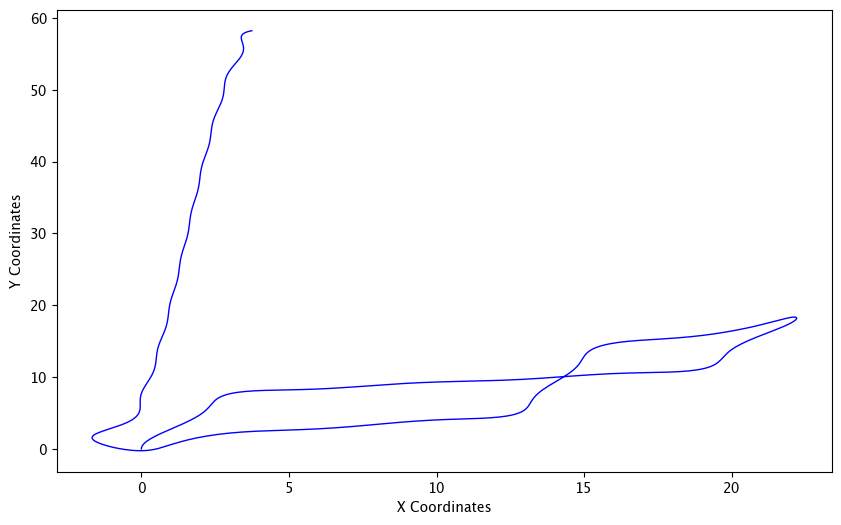

In [74]:
plt.figure(figsize=(10, 6))
plt.plot(x_coords, y_coords, 'b-', linewidth=1, label='y(x)')
plt.xlabel("X Coordinates")
plt.ylabel("Y Coordinates")
plt.show()

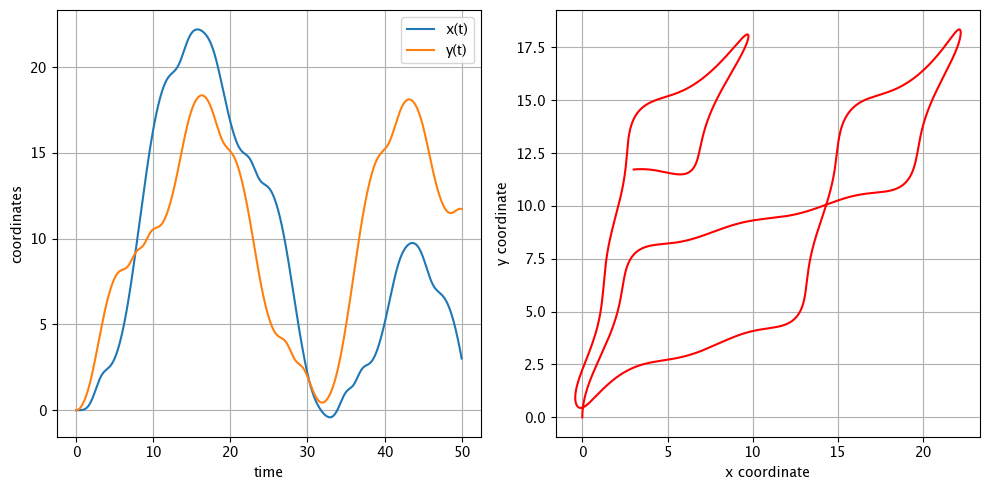

In [78]:
import numpy as np
import matplotlib.pyplot as plt


# Define the system: second-order ODEs -> first-order system
def Force(state):
    x, vx, y, vy = state
    dxdt = vx
    dvxdt = np.sin(y)
    dydt = vy
    dvydt = np.cos(x)
    return np.array([dxdt, dvxdt, dydt, dvydt])


# Runge-Kutta 4 step
def rk4_step(f, state, t, dt):
    k1 = f(state)
    k2 = f(state + 0.5 * dt * k1)
    k3 = f(state + 0.5 * dt * k2)
    k4 = f(state + dt * k3)
    return state + (dt / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)


# Solver
def Solver(f, state_initial, t_max, dt):
    n_steps = int(t_max / dt)
    t_eval = np.linspace(0, t_max, n_steps)

    state = state_initial
    x_history = np.zeros(n_steps)
    y_history = np.zeros(n_steps)

    x_history[0] = state[0]  # x
    y_history[0] = state[2]  # y

    for i in range(1, n_steps):
        state = rk4_step(f, state, t_eval[i], dt)
        x_history[i] = state[0]
        y_history[i] = state[2]

    return x_history, y_history, t_eval


# Initial conditions: [x, vx, y, vy]
state_initial = np.array([0.0, 0.0, 0.0, 0.0])
dt = 0.001
x_coords, y_coords, time = Solver(Force, state_initial, 50, dt)

# Plot results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(time, x_coords, label="x(t)")
plt.plot(time, y_coords, label="y(t)")
plt.xlabel("time")
plt.ylabel("coordinates")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(x_coords, y_coords, color="red", label="Phase Plot")
plt.xlabel("x coordinate")
plt.ylabel("y coordinate")
plt.grid()

plt.tight_layout()
plt.show()